# **Import Libraries**

In [ ]:
# !pip install -U matplotlib
!pip install -U matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

In [ ]:
import matplotlib

print(matplotlib.__version__)
print(sns.__version__)
print(pd.__version__)

3.2.2
0.11.2
1.3.5


# **Load Data** <br>
Data yang digunakan yaitu [Used Car Auction Prices](https://www.kaggle.com/datasets/tunguz/used-car-auction-prices) dari kaggle.com.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_prices.csv', on_bad_lines='skip')

# STAGE 1: EDA

# **1. Descriptive Statistics** <br>
Hal yang perlu diperhatikan:



- A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
- B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
- C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)



## 1.1 DataFrame General Information

__Deskripsi:__
- Make : The brand of the car.
- Model : The edition of the car of a specific brand.
- Trim : The trim levels for a car are just different versions of the model.
- Body : The body style of a vehicle refers to the shape and model of a particular car make.
- Transmission : The mechanism that moves the power from the engine to the wheels.
- VIN : Vehichle identification number.
- State : The state in which the car is auctioned.
- Condition : The condition of the cars being at the time of auction.
- Odometer : The distance the car has travelled since manufactured.
- Color : Exterior color of the car.
- Interior : Interior color of the car.
- Seller : The seller of the car, car dealers.
- mmr : Manhiem market record, the market estimated price of the cars. (perkiraan harga pasar mobil) [see this](https://press.manheim.com/company-overview)
- sellingprice : The price a car was sold at auctions. (hrg mobil yg dijual di pelelangan)
- saledate : The date on which the car has been sold.

__MMR:__ <br>
What really intersting is that mmr and sellingprice are so highly correlated. I did not find an explanation in wikipedia. But with Google I found this https://www.autoauctionmall.com/learning-center/what-does-mmr-mean/.

MMR in the car business stands for Manheim Market Report, an indicator of wholesale prices.

Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company and its MMR is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period to .

I think that explained why mmr and sellingprice are so close to each other in the figure. mmr is a evaluation made by the Manheim company.The company should make full use of all the infomation of car like model,odometer and so on.

So it is not a good idea to take mmr as a explanatory feature.

In [ ]:
df.shape # (jumlah baris, jumlah kolom)

(558811, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


**HASIL PENGAMATAN:**
*   Dataset terdiri dari 558,811 baris dan 16 kolom.
*   Terdapat 9 kolom yang missing value (Non-null count < Jumlah baris) yaitu: `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`.
*   Untuk kolom `saledate` tipe datanya bukan datetime melainkan object, sehingga perlu dicek lagi entrinya. Selain itu, sepertinya tidak ada kolom lain dengan tipe data yang aneh.

## 1.2 Data Types (Numerical & Non-Numerical Features) <br>

### 1.2.1 Numerical Features <br>

In [ ]:
num = ["year", "condition", "odometer", "mmr", "sellingprice"]

**HASIL PENGAMATAN:** Terdapat 5 kolom numerik.

### 1.2.2 Non-Numerical Features

In [ ]:
cat = ["make", "model", "trim", "body", "transmission", "vin", "state", "color", "interior", "seller", "saledate"]

**HASIL PENGAMATAN:** Terdapat 11 kolom kategorikal.

## 1.3 Checking Duplicated Data <br>
Cek data duplikat di keseluruhan DataFrame.

In [ ]:
df.duplicated().sum()

0

**HASIL PENGAMATAN:** <br>
tidak terdapat data yang duplikat pada tabel df.

## 1.4 Missing Value Calculation

In [ ]:
mv = df.isnull().sum()
tmv = df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv, pmv], axis=1)
mdf.columns = ['Missing Value Total', 'Missing Value Percentage (%)']
mdf

,Missing Value Total,Missing Value Percentage (%)
year,0,0.000000
make,10301,1.843378
model,10399,1.860915
trim,10651,1.906011
body,13195,2.361263
transmission,65353,11.695010
vin,0,0.000000
state,0,0.000000
condition,11794,2.110553
odometer,94,0.016821


**HASIL PENGAMATAN:** <br>
Berdasarkan output di atas, terdapat 9 kolom yang memiliki missing value, yaitu kolom `make`, `model`, `trim`, `body`, `transmission`, `color`, `odometer`, `condition`, dan `interior`. Teramati 8 kolom memiliki persentase missing value < 2.5% sehingga dapat dikategorikan masih relatif aman. Akan tetapi, terdapat 1 kolom yang memiliki persentase missing value mencapai 11.7% dari total keseluruhan baris, yakni kolom `transmission`.


Kita dapat memanfaatkan library **missingno** untuk mengamati persebaran missing value di setiap kolom.

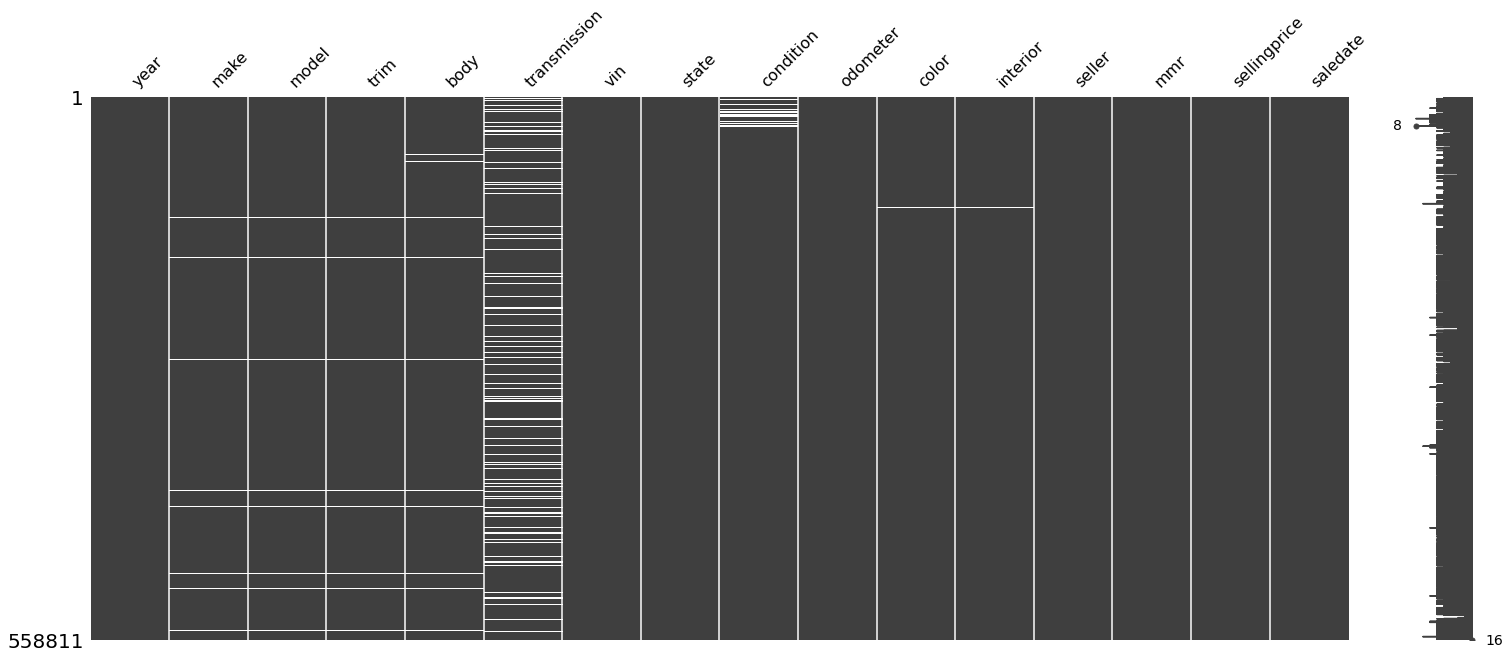

In [ ]:
# Plot of Missing Values using matrix and heatmap missingno
import missingno as msno
msno.matrix(df);

Kita juga dapat melihat korelasi dari missing value di satu kolom dengan kolom lainnya menggunakan [heatmap di **missingno**](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009#:~:text=Using%20missingno%20to%20Identify%20Missing,advantages%20for%20identifying%20missing%20data/).

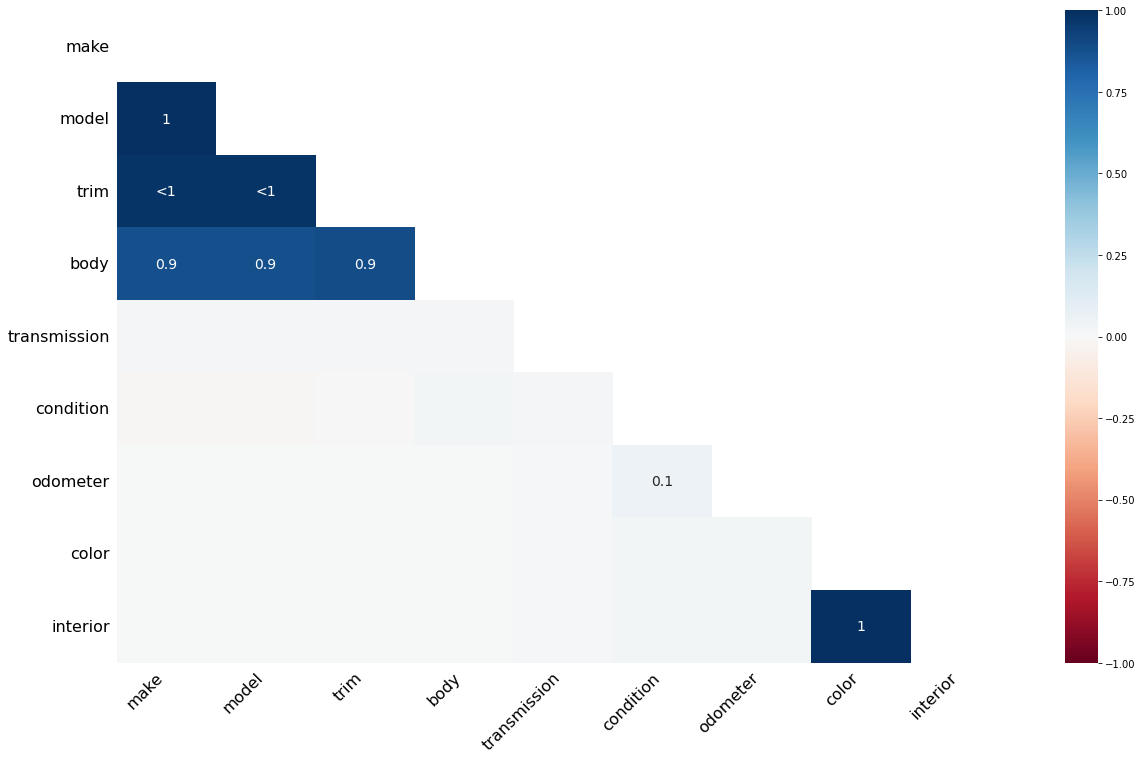

In [ ]:
msno.heatmap(df);

**HASIL PENGAMATAN:** <br>
Berdasarkan heatmap di atas, kita dapat melihat bahwa pasangan antara dua kolom di bawah ini memiliki korelasi positif yang sangat tinggi (mendekati 1).
- body-make
- body-model
- body-trim
- trim-make
- trim-model
- model-make
- interior-color

Artinya, ketika suatu baris di suatu kolom memiliki missing value, maka baris yang sama juga merupakan missing value di kolom lainnya. Contoh, kolom `model` dan kolom `make` memiliki nilai korelasi +1, maka semua baris yang missing value di kolom `model` merupakan semua baris yang juga missing value di kolom `make`. Hal tersebut dapat dibuktikan juga dari plot matrix yang telah dilakukan di tahap sebelumnya (posisi garis putih sebagai indikator missing value yang sama di kolom `model` dan kolom `make`.


Oleh karena itu, salah satu solusi yang dapat dipilih untuk mengatasi missing value dari kolom `model`, `make`, `trim`, dan `body` adalah dengan cara **menghapus barisnya**, karena missing value terletak pada baris yang sama di hampir keseluruhan kolom-kolom tersebut. Sedangkan, untuk prosedur imputation sepertinya akan terlalu riskan untuk dilakukan, karena kita perlu mengisi suatu baris yang kosong di keempat kolom sekaligus.



## 1.5 Descriptive statiscs of numerical features <br>
Hal-hal yang perlu diperhatikan:
- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah terdapat keanehan dengan nilai maksimal dan nilai minimal di setiap kolom/feature?
- Bagaimana kira-kira distribusi data berdasarkan analisis singkat dari nilai mean dan median?


In [ ]:
df[num].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [ ]:
o99 = (df['odometer'][(df['odometer']==999999) & (df['year']>=1982)].count())
p99 = o99/(df['odometer'].count())*100

print(f'mobil tertua yang mungkin ada pada lelang adalah {df.year.max()-df.year.min()} tahun')
print(f'total mobil yang dijual dan berodometer 999999 adalah {o99} dengan persentasenya sebesar {p99}% ')

mobil tertua yang mungkin ada pada lelang adalah 33 tahun
total mobil yang dijual dan berodometer 999999 adalah 72 dengan persentasenya sebesar 0.012886667132018536% 


**HASIL PENGAMATAN:** <br>
Berdasarkan laman web [PolicyAdvice](https://policyadvice.net/insurance/insights/how-much-do-americans-drive/) dan [metromile](https://www.metromile.com/blog/average-miles-driven-per-year-by-americans/), pengendara mobil di amerika rata-rata menempuh jarak sejauh (rata-rata) 13.500 km dalam satu tahunnya (laki-laki sejauh 16.550 km dan perempuan sejauh 10.412) yang berarti butuh sekitar 97 tahun bagi seorang laki-laki untuk menghasilkan odometer 999.999 miles / (1609342.39km).

Oleh karena itu, value odometer 999999 akan diubah. (?) dibuang aja


- Nilai minimum `mmr` sebesar 25 mengundang kecurigaan. Mobil seperti apa yang mmr-nya hanya sebesar 25 USD?
- Nilai minimum `sellingprice` sebesar 1 juga menimbulkan pertanyaan "Mobil apa yang harganya 1 USD?".
- Nilai maksimum pada kolom `mmr` dan `sellingprice` sangat tinggi dibandingkan dengan nilai mean/median-nya. 



siapa? Terdapat banyak data yang value-nya sama namun dengan penulisan yang berbeda (baik karma terdapat huruf kapital/disingkat)


## 1.6 Descriptive statiscs of Non-Numerical Features <br>
Hal-hal yang perlu diperhatikan:
- Apakah jumlah unique values di setiap kolom masuk akal?
- Apakah ada ketimpangan jumlah nilai dari setiap unique values? Misal ada 1 nilai yang dominan

In [ ]:
df[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


**HASIL PENGAMATAN:** <br>
- Kolom dengan jumlah unique values < 10 hanyalah kolom `transmission`.
- Kolom lainnya memiliki unique values >= 17, bahkan ada kolom yang jumlah unique values-nya mencapai 550,296.

Sekarang, kita coba tamplikan semua unique values dari setiap kolom. Hal ini perlu dilakukan untuk mengetahui apakah ada value yang tidak konsisten pada data kita.

In [ ]:
# Unique Values of Non-Numerical Features
cat_selected = ['make', 'body', 'transmission', 'state', 'color', 'interior']

for i in cat_selected:
  if not i == 'model':
    total = df[i].nunique()
    print(f'unique value kolom {i}:', 'total:', total)
    print(f'{df[i].unique()}\n')

unique value kolom make: total: 96
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']

unique value kolom body: t

**HASIL PENGAMATAN:** <br>
- Kolom yang ***di-drop***: `model`, `trim`, `vin`, `seller`. Jumlah unique valuenya sangat banyak.

- kolom `make`:
  - Ada entri yang tidak konsisten penamaannya, contohnya: Kia dan kia; Porsche dan porsche;  Lincoln dan lincoln; plymouth dan Plymouth;.

- kolom `body`:
  - Ada entri yang tidak konsisten penamaannya, contohnya: SUV dan suv; Camaro dan camaro; dll.
  - Ada entri yg body-nya spesifik pakai seri dan ada yang umum saja, contohnya: convertible dan q60 convertible; Sedan dan sedan.


- kolom `transmission`: Aman, tidak ada masalah

- kolom `state`: Aman, tidak ada masalah.

- kolom `color`:
  - Ada entri berisi **-**, mungkin untuk menandakan warna mobil yang tidak diketahui(?). Bisa diganti dengan *unknown*.

- kolom `interior`:
  - Ada entri berisi **-**, mungkin untuk menandakan interior mobil yang tidak diketahui(?). Bisa diganti dengan *unknown*.


Kita perlu menyamakan nilai yang tidak konsisten pada setiap kolom saat berada di tahap Data Preparation.

# **2. Univariate Analysis**

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing

## 2.1 Numerical Features

### 2.1.1 Boxplot
Hal yang perlu diperhatikan dari boxplot adalah keberadaan pencilan (outlier) dari setiap feature.

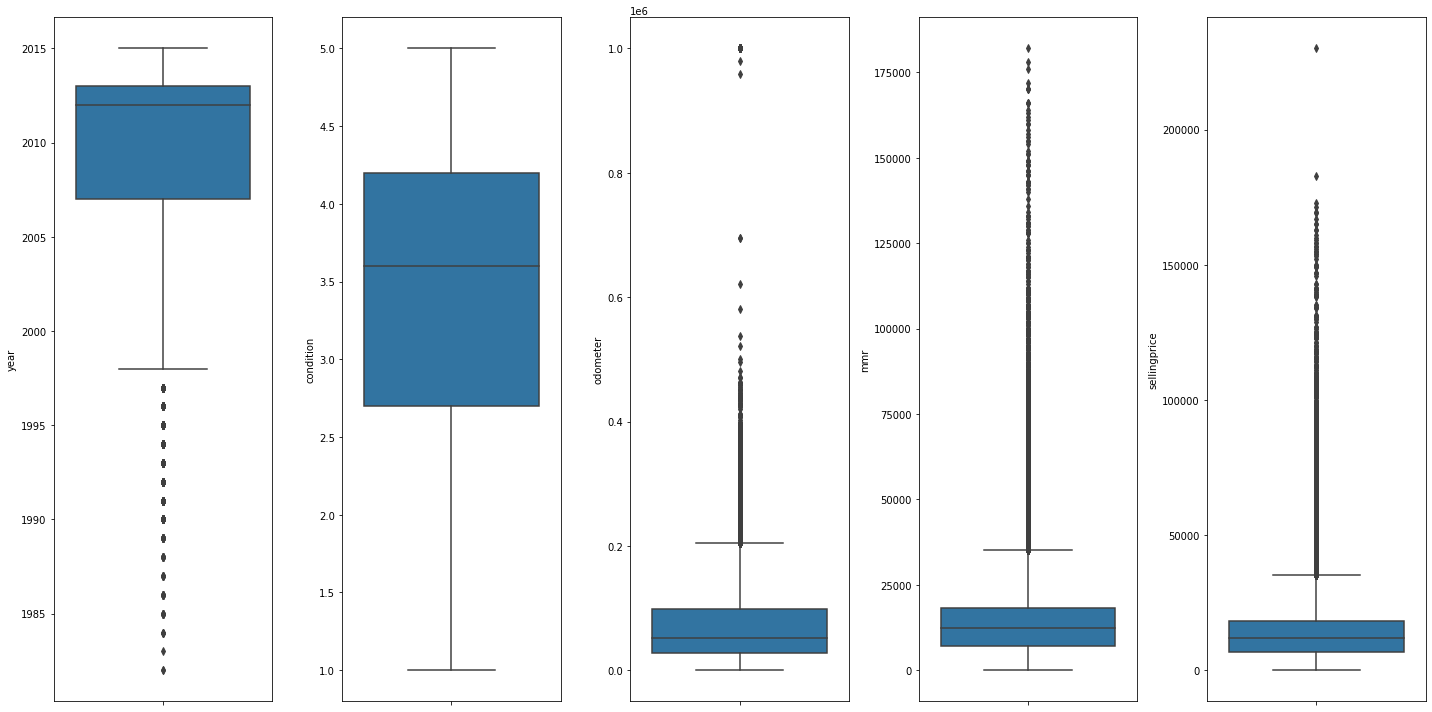

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y = df[num[i]], orient = 'v')
    plt.tight_layout()

**HASIL PENGAMATAN:** <br>
- Terdapat outlier pada kolom Odometer dan Sellingprice.

### 2.1.3 KDE plot

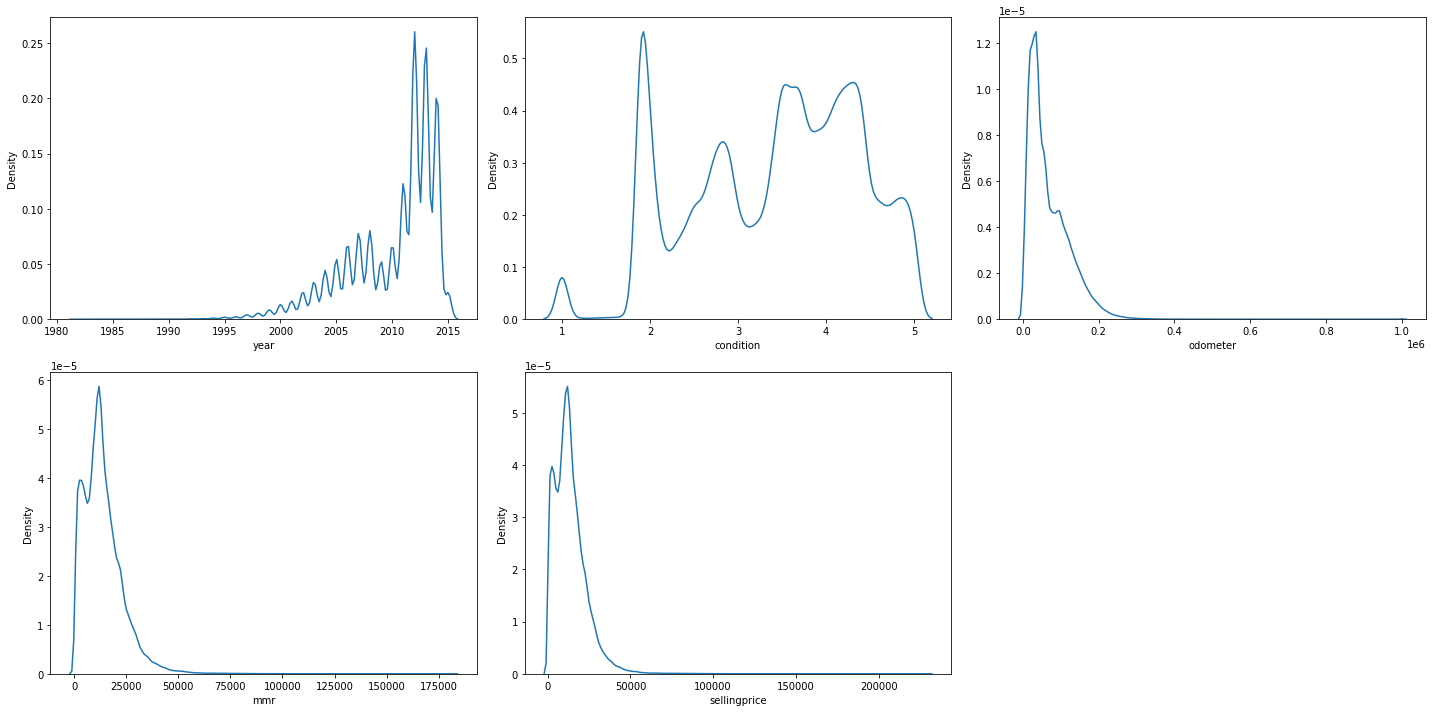

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(num)):
    plt.subplot(2,3, i+1)
    sns.kdeplot(x = df[num[i]])
plt.tight_layout()

**HASIL PENGAMATAN:**
- Kebanyakan mobil bekas yg tersedia adalah termasuk tahun yg baru, karena jumlahnya lebih banyak dibanding tahun yg lama (tua).
- Mayoritas harga mobil <= 50,000 USD.
- Hanya kolom condition yang terdistribusi normal.


## 2.2 Non-Numerical Features

### 2.2.1 Barplot/Countplot

**Make**

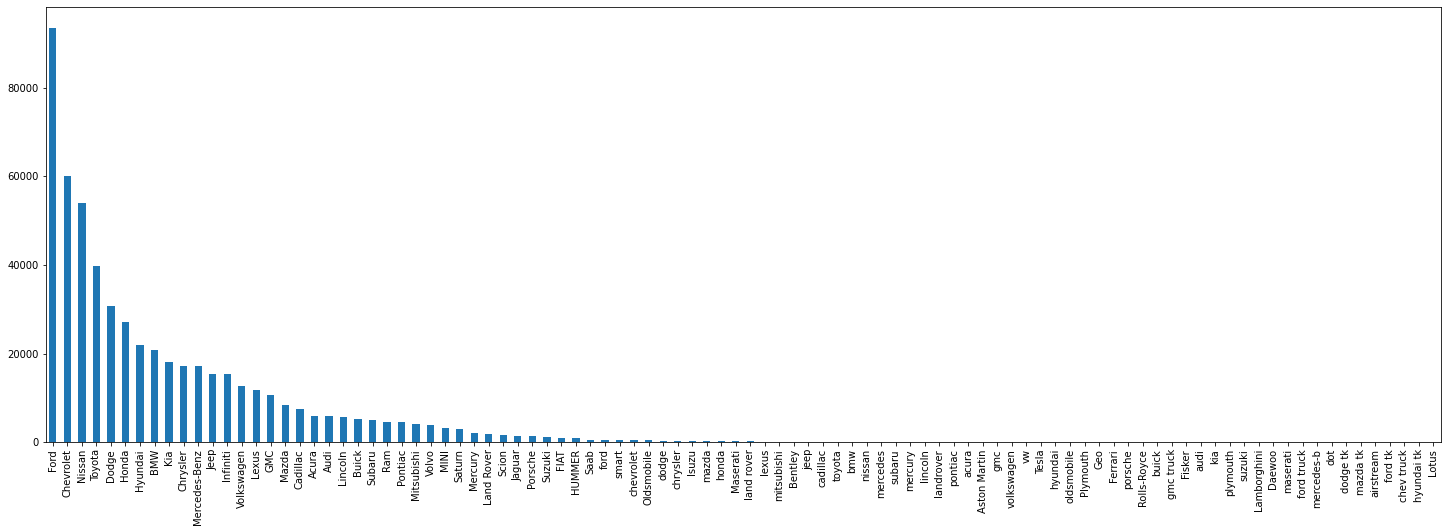

In [ ]:
# semua value make
plt.figure(figsize=(25, 8))
df['make'].value_counts().plot(kind="bar");

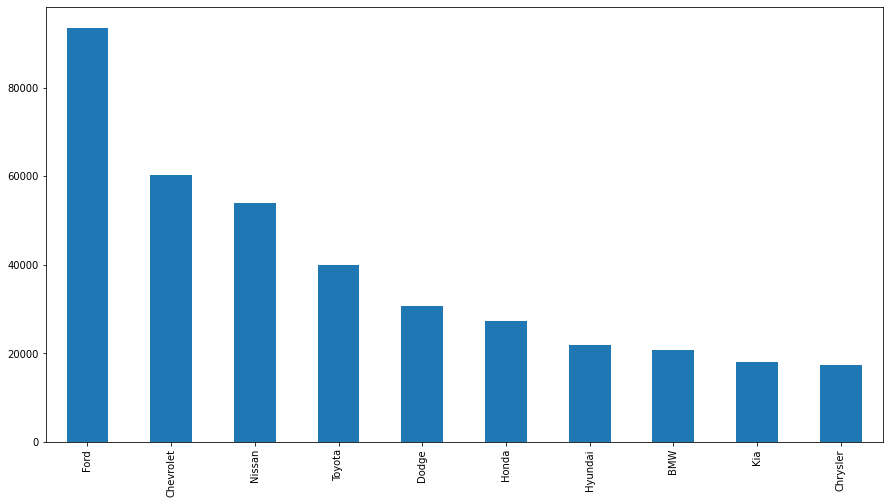

In [ ]:
# top 10 make
plt.figure(figsize=(15, 8))
df['make'].value_counts()[:10].plot(kind="bar");

**Body**

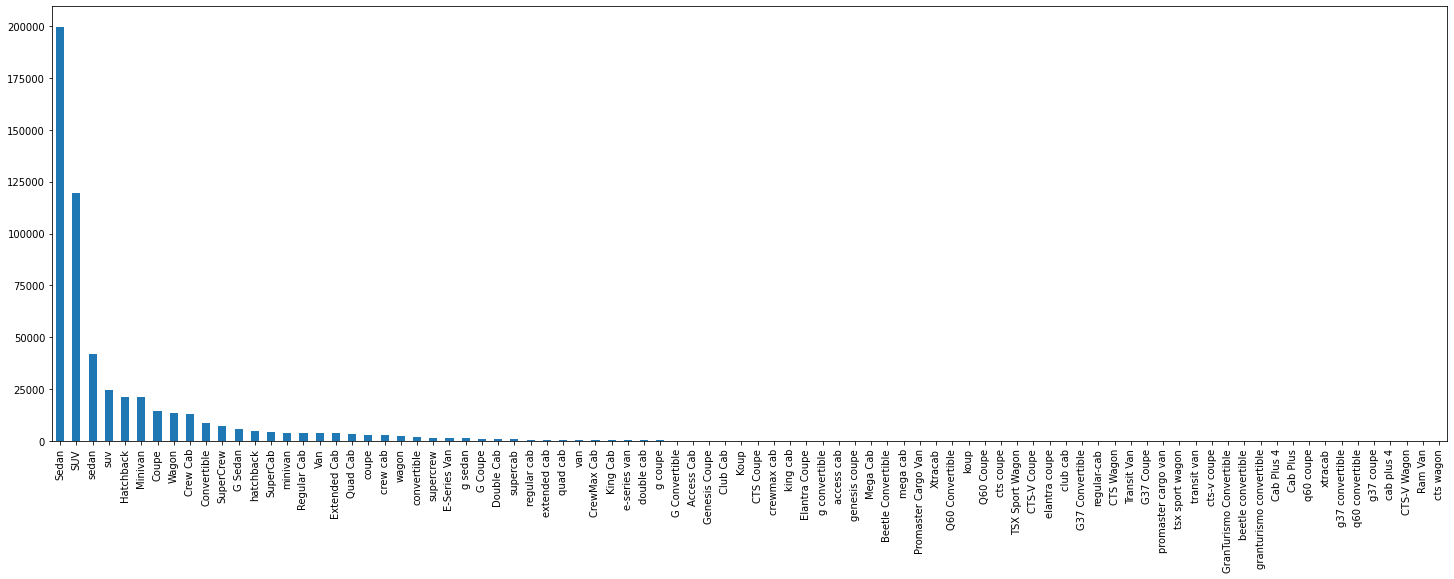

In [ ]:
# semua value body
plt.figure(figsize=(25, 8))
df['body'].value_counts().plot(kind="bar");

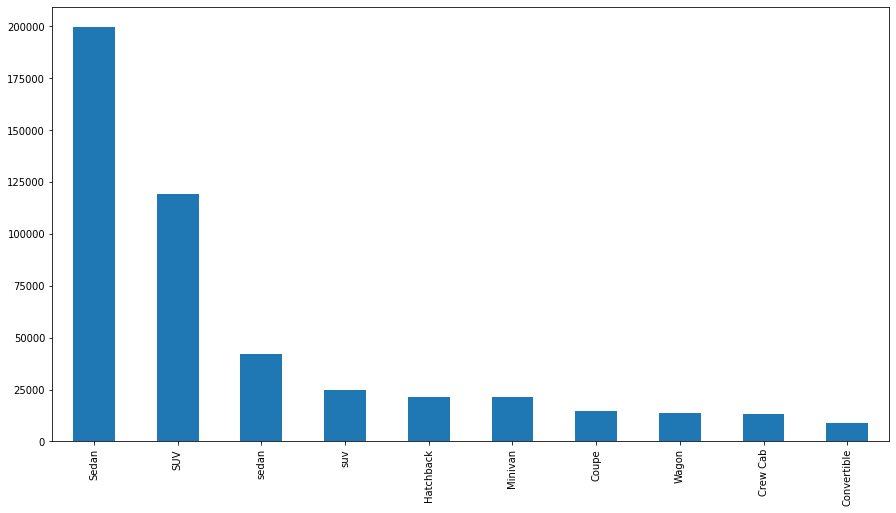

In [ ]:
# top 10 body
plt.figure(figsize=(15, 8))
df['body'].value_counts()[:10].plot(kind="bar");

**Color**

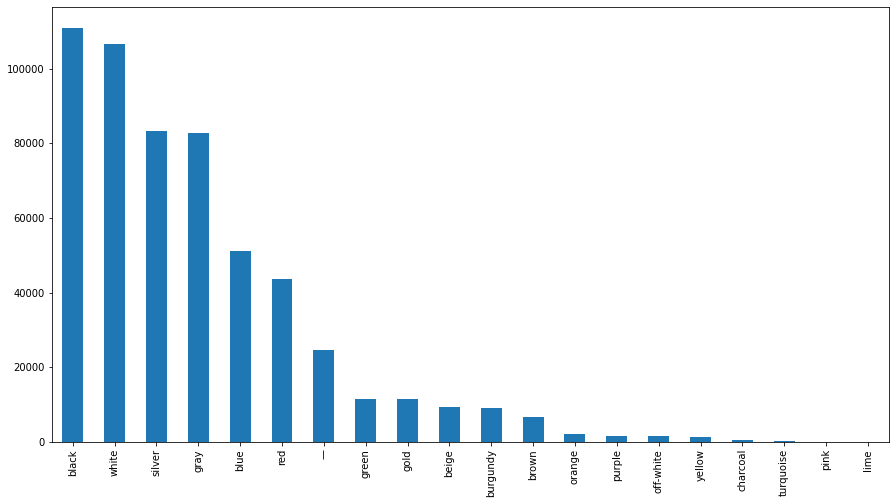

In [ ]:
# semua value color
plt.figure(figsize=(15, 8))
df['color'].value_counts().plot(kind="bar");

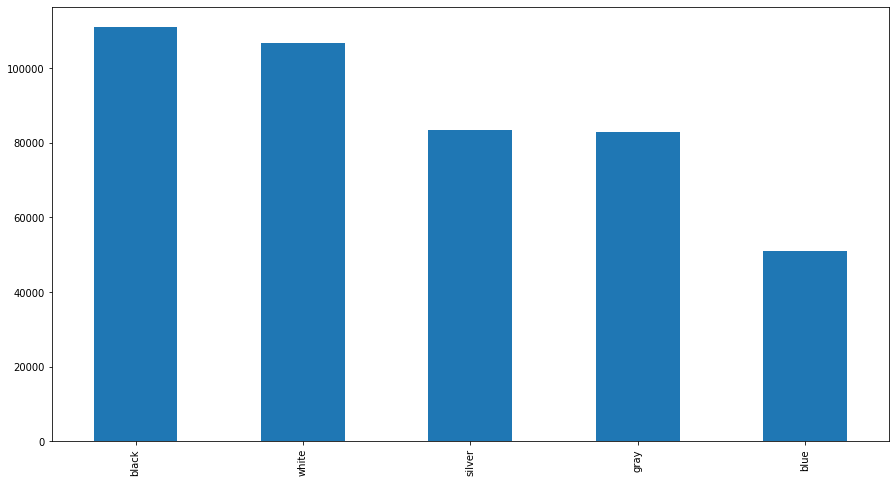

In [ ]:
# top 5 color
plt.figure(figsize=(15, 8))
df['color'].value_counts()[:5].plot(kind="bar");

**Hasil Pengamatan:** Top 5 color adalah black, white, silver, gray, dan blue.

**Interior**

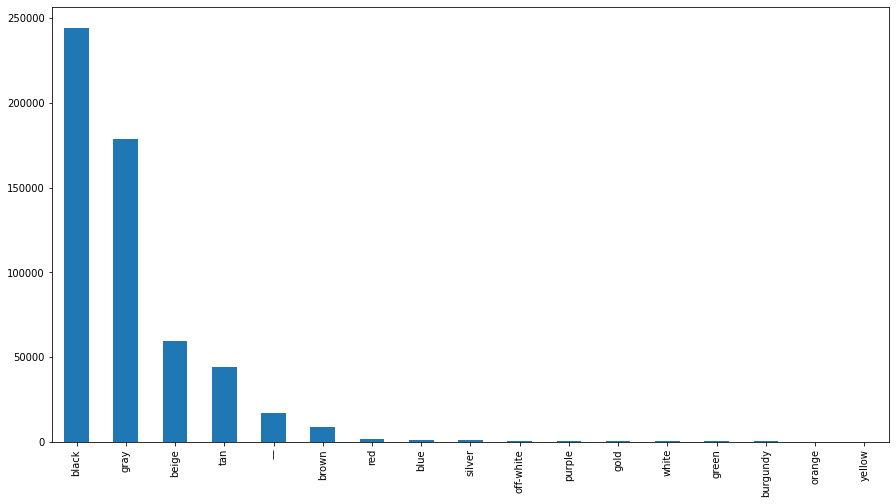

In [ ]:
# semua value interior
plt.figure(figsize=(15, 8))
df['interior'].value_counts().plot(kind="bar");

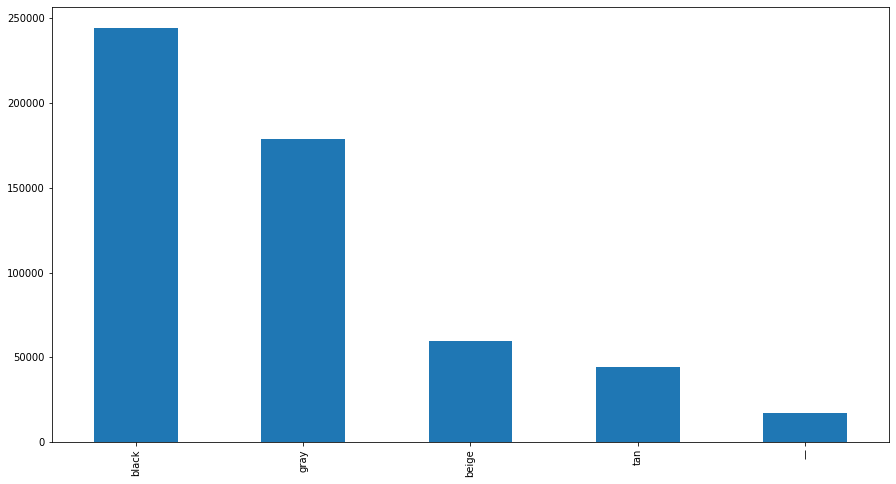

In [ ]:
# top 5 interior
plt.figure(figsize=(15, 8))
df['interior'].value_counts()[:5].plot(kind="bar");

**State**

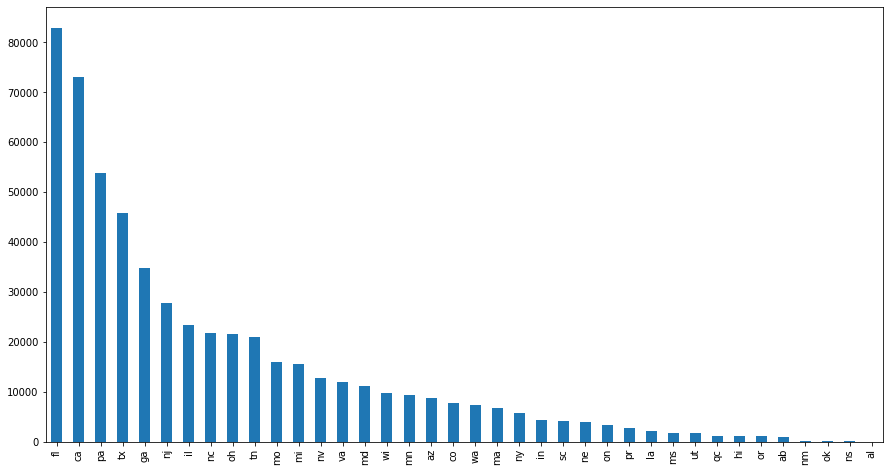

In [ ]:
# semua value state
plt.figure(figsize=(15, 8))
df['state'].value_counts().plot(kind="bar");

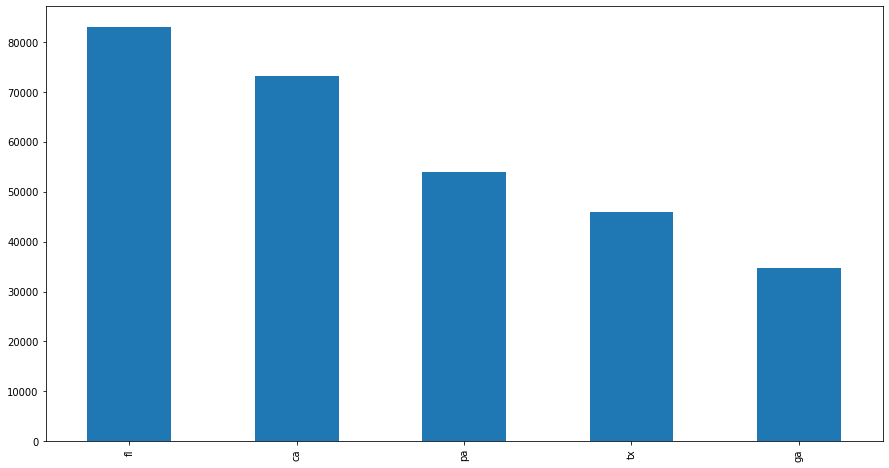

In [ ]:
# top 5 state
plt.figure(figsize=(15, 8))
df['state'].value_counts()[:5].plot(kind="bar");

**Transimission**

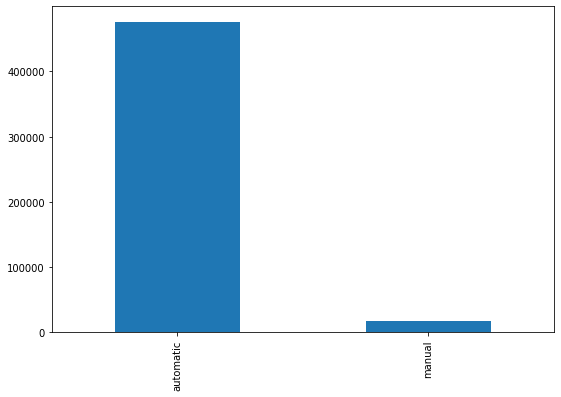

In [ ]:
plt.figure(figsize=(9, 6))
df['transmission'].value_counts().plot(kind="bar");

# **3. Multivariate Analysis**

## 3.1 Numerical Features

### 3.1.1 Correlation Heatmap <br>

Hal- hal yang perlu diperhatikan:
- Apakah feature memiliki korelasi dengan target?
- Apakah ada 2 feature yang berkorelasi kuat (abs (>0.7))? Bila ya, ada kemungkinan besar kedua feature tersebut 
redundan [**Multicollinearity**](https://www.investopedia.com/terms/m/multicollinearity.asp#:~:text=Multicollinearity%20is%20a%20statistical%20concept,in%20less%20reliable%20statistical%20inferences).

In [ ]:
df.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


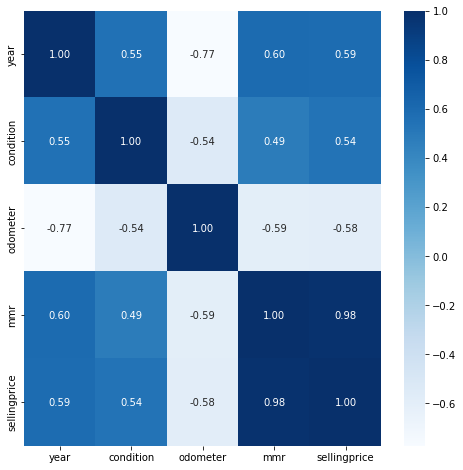

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

**HASIL PENGAMATAN:** <br>
- Target kita `sellingprice` memiliki korelasi positif cukup kuat dengan `mmr`, `year` dan `condition` (strong potential feature)
- Sedangkan korelasi `sellingprice` dengan `odometer` adalah negatif cukup kuat
- `year` memiliki korelasi positif cukup kuat dengan `mmr`. Ada kemungkinan kedua *feature* ini redundan (dipilih salah satunya saja untuk training data)

### 3.1.2 Pairplot

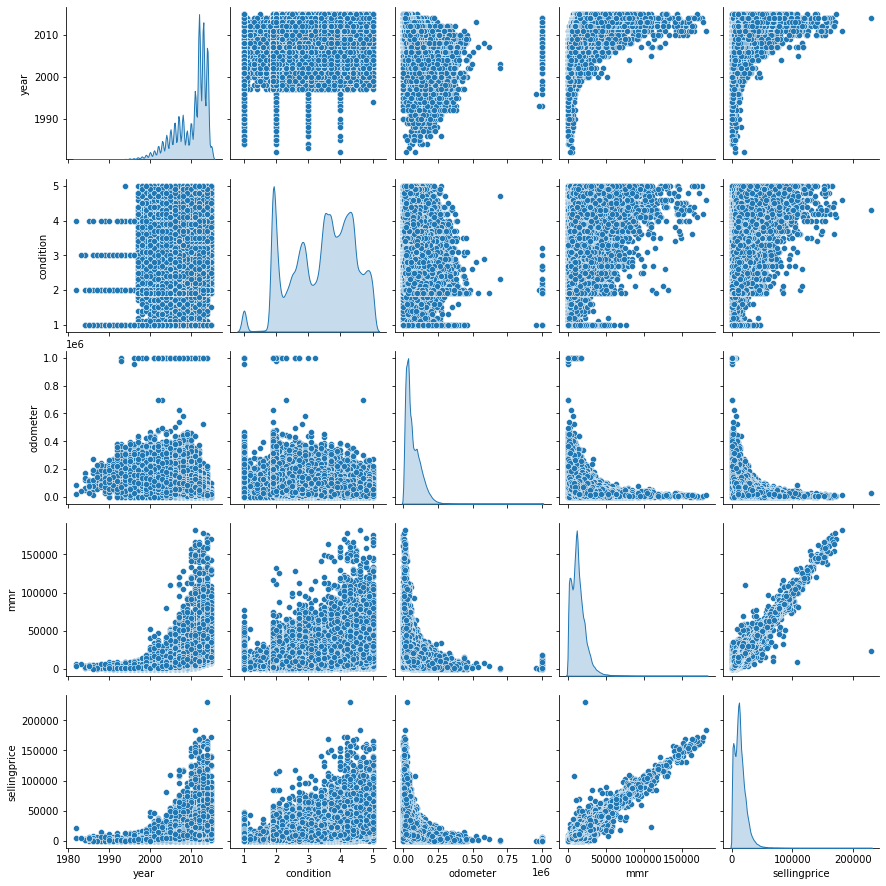

In [ ]:
sns.pairplot(df, diag_kind='kde');

# TODO

**HASIL PENGAMATAN:** <br>
- `year` diatas 2000 memiliki `sellingprice` yang tinggi
- mobil dengan `condition` > 3 memiliki `sellingprice` yang tinggi
- Secara umum, semakin sedikit `odometer` maka `sellingprice` tinggi
- `sellingprice` dan `mmr` sangat jelas memiliki korelasi linear

## 3.2 Non-Numerical Features <br>
Categorical columns vs Target Variable

In [ ]:
df[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


### 3.2.1 Transmission vs Sellingprice

https://seaborn.pydata.org/generated/seaborn.kdeplot.html


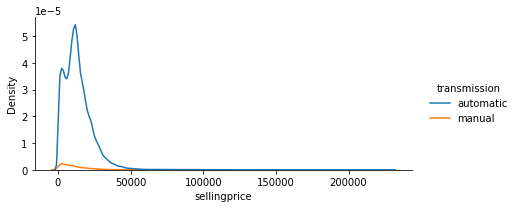

In [ ]:
sns.displot(data=df, x='sellingprice', kind='kde', hue='transmission', height=3,aspect=2);

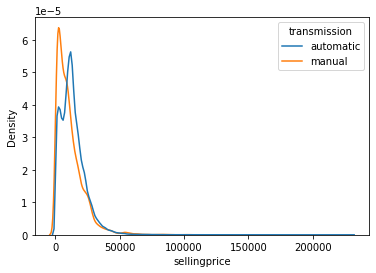

In [ ]:
# normalisasi
sns.kdeplot(data=df, x='sellingprice', hue='transmission', common_norm=False);

**HASIL PENGAMATAN:** <br>
Berdasarkan plot KDE di atas, dapat dilihat bahwa terdapat sedikit perbedaan behaviour antara transmisi automatic dan manual sehingga feature ini masih berpotensi untuk digunakan dalam pemodelan ML. Terlihat bahwa mobil dengan transmission automatic memiliki puncak distribusi yang lebih ke kanan dibandingkan puncak distribusi transmisi manual. Artinya, sellingprice dari automatic lebih tinggi dibandingkan manual.

### 3.2.2 Color vs Sellingprice

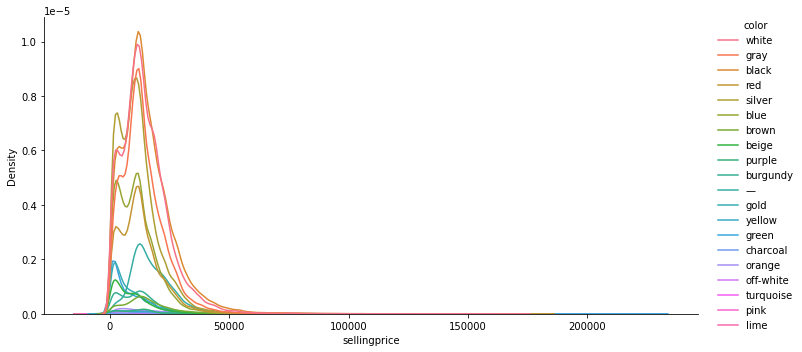

In [ ]:
sns.displot(data=df,x='sellingprice',kind='kde',hue='color',height=5,aspect=2);

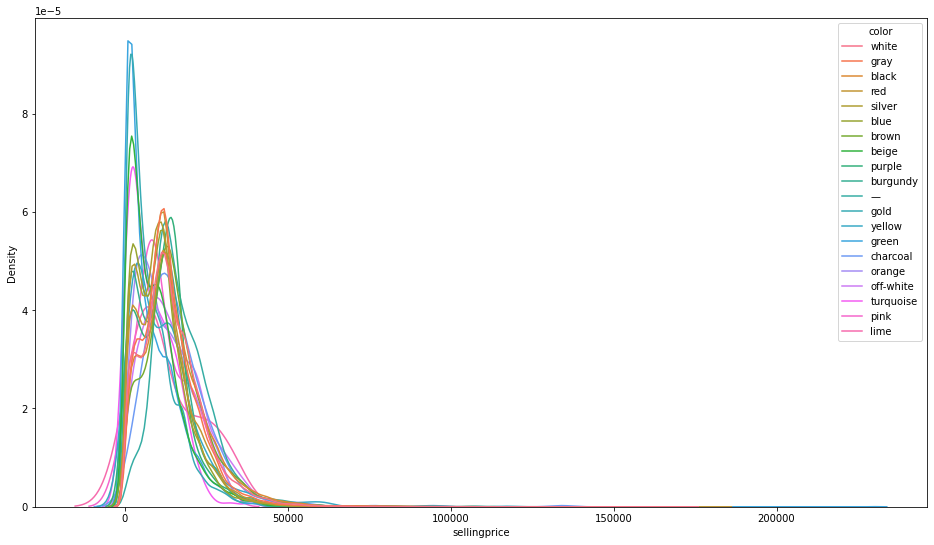

In [ ]:
# normalisasi 
plt.figure(figsize=(16, 9))
sns.kdeplot(data=df, x='sellingprice', hue='color', common_norm=False);

In [ ]:
color_grouped = df.groupby('color').agg({'sellingprice':'mean'}).reset_index()
color_grouped.sort_values('sellingprice', ascending=True)

,color,sellingprice
8,green,8301.808733
6,gold,8324.714953
16,turquoise,8374.478814
0,beige,9431.169269
2,blue,11440.610395
12,pink,11746.428571
15,silver,11780.854813
4,burgundy,11902.997548
13,purple,11969.684817
18,yellow,12652.202335


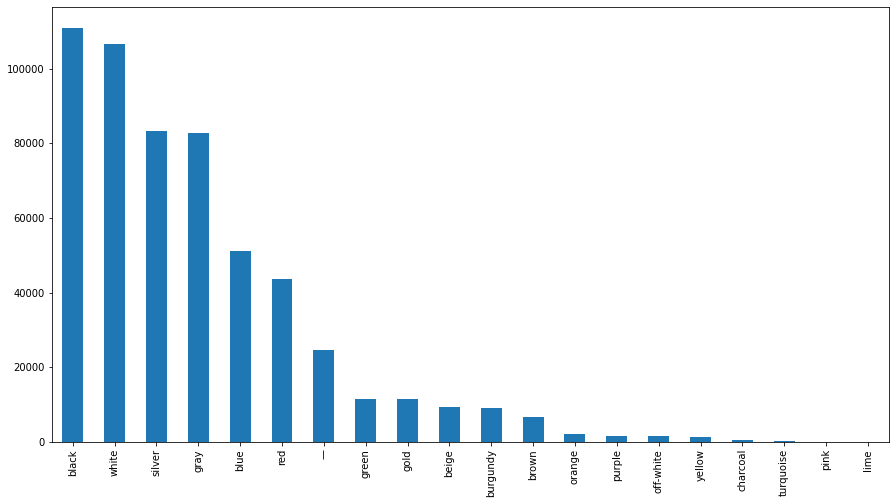

In [ ]:
# semua value color
plt.figure(figsize=(15, 8))
df['color'].value_counts().plot(kind="bar");

**HASIL PENGAMATAN:** <br>
- Mobil dengan `color` white, black, gray lebih banyak terjual.
- Berdasarkan kdeplot di atas, terdapat behaviour yang berbeda antar.


Untuk membatasi jumlah unique value pada kolom `color`, maka kita dapat memilih 9 unique value berdasarkan pengamatan kita pada DataFrame color_grouped dan barplot di atas. Kita memilih 9 color yang peminatnya banyak tetapi secara harga juga berbeda dengan color lainnya. Harapannya melalui 9 unique value ini ditambah value others sebagai sisa dari color lainnya mampu meningkatkan performa model ML. 9 Color tersebut yaitu: black, white, silver, gray, blue, red, brown, green, gold.

### 3.2.3 State vs Sellingprice

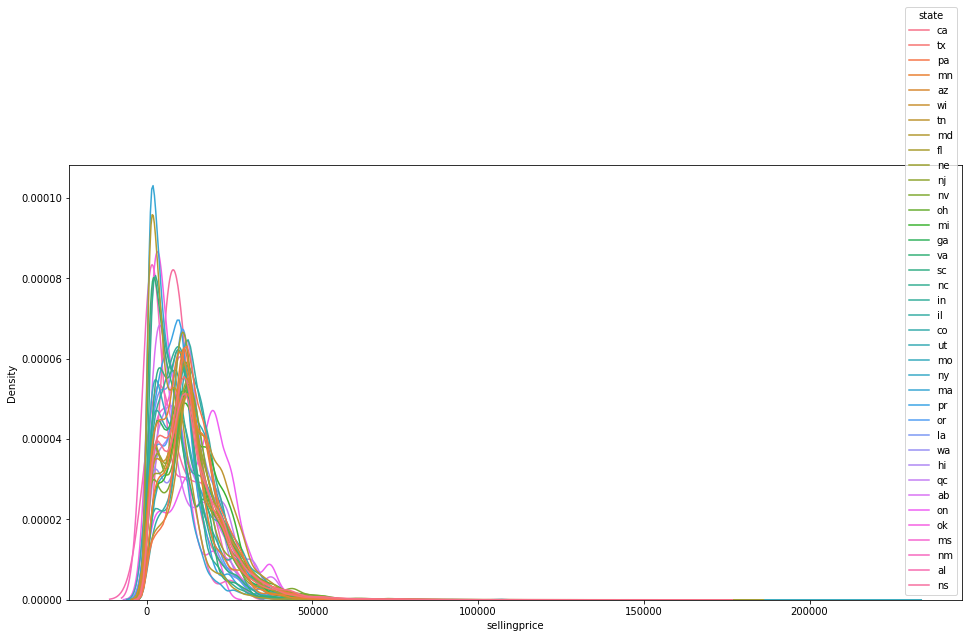

In [ ]:
# normalisasi
plt.figure(figsize=(16, 8))
sns.kdeplot(data=df, x='sellingprice',hue= 'state',common_norm=False);

In [ ]:
state_grouped = df.groupby('state').agg({'sellingprice':'median'}).reset_index()

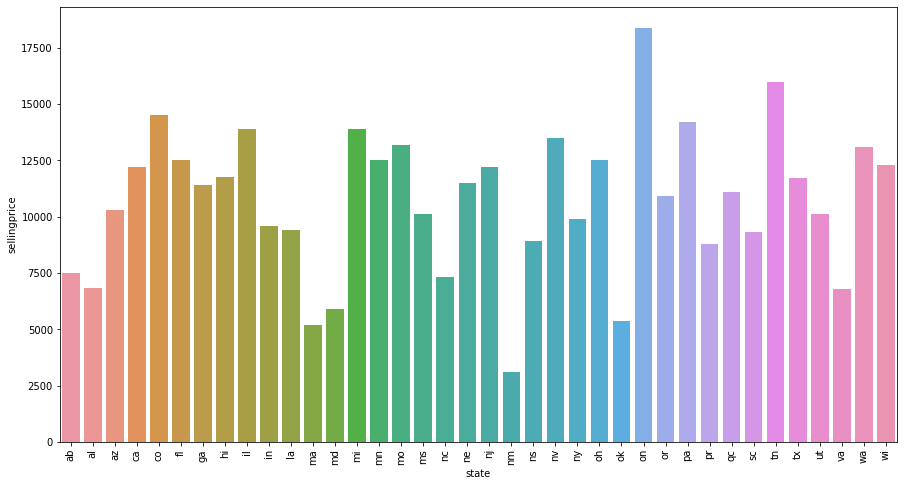

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='sellingprice', data=state_grouped)
plt.xticks(rotation=90);

**HASIL PENGAMATAN:** <br>
Berdasarkan kdeplot di atas, sepertinya tidak ada perbedaan behaviour yang signifikan antar state. Sepertinya kolom ini akan di-drop saja.

### 3.2.4 Interior Color vs Sellingprice

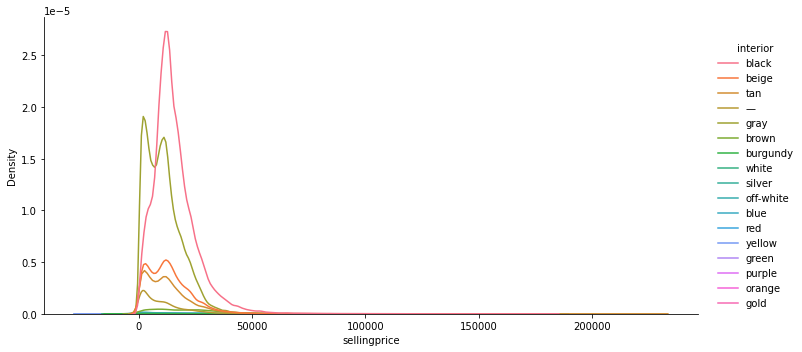

In [ ]:
sns.displot(data=df,x='sellingprice',kind='kde',hue='interior',height=5,aspect=2);

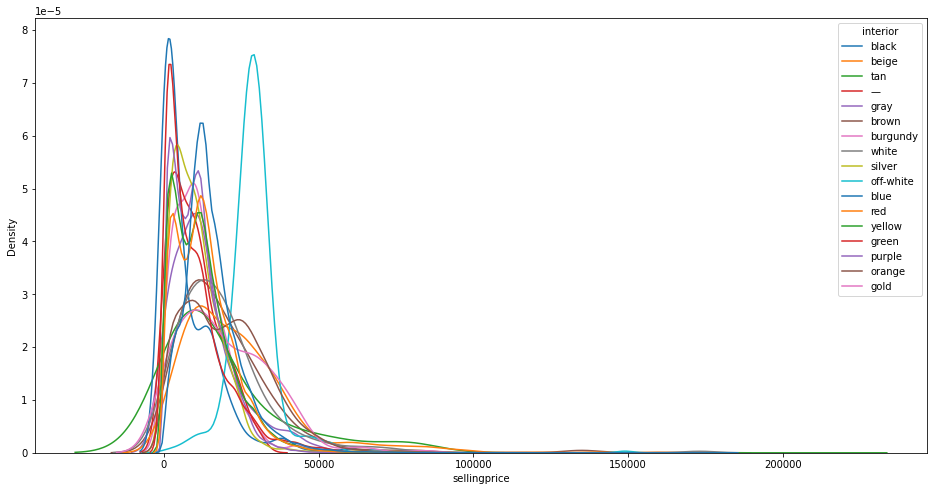

In [ ]:
# normalisasi
plt.figure(figsize=(16, 8))
sns.kdeplot(data=df, x='sellingprice',hue='interior',common_norm=False, palette="tab10");

In [ ]:
interior_grouped = df.groupby('interior').agg({'sellingprice':'mean'}).reset_index()

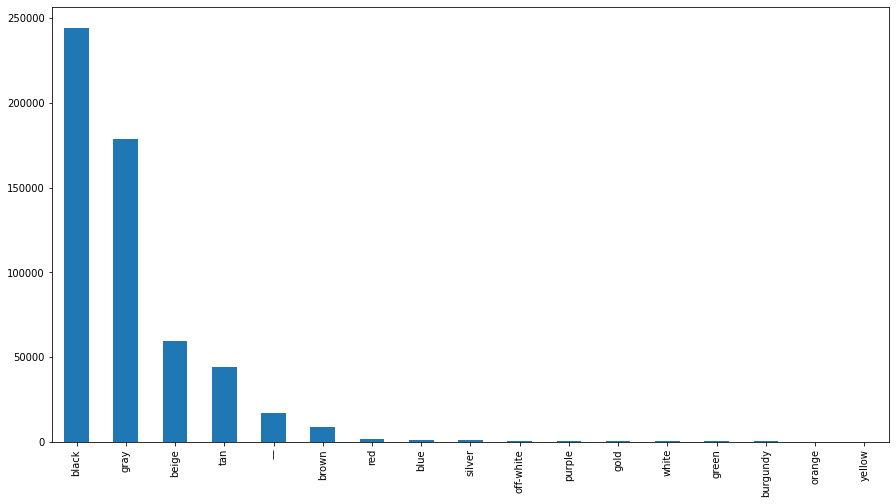

In [ ]:
# semua value interior
plt.figure(figsize=(15, 8))
df['interior'].value_counts().plot(kind="bar");

**HASIL PENGAMATAN**<br>

- `interior` black cenderung memiliki `sellingprice` yang tinggi (puncak distribusi berada lebih kanan dibanding yang lain).
- Sepertinya semua `color` sama saja efeknya terhadap `sellingprice`.

Dari dua barplot di atas, kita dapat memilih 7 unique value saja untuk menghindari jumlah unique value yang banyak pada kolom `interior`. Pemilihan unique value ini berdasarkan perbedaan harga yang signifikan antara satu sama lain. Harga mobil yang relatif sama kita ganti valuenya menjadi others. 7 unique value tersebut antara lain: black, blue, brown, off-white, red, beige, blue

---

# STAGE 2: Data Pre-processing 

# **4. Data Pre-processing** <br>

## 4.1 Handling Duplicated Data

In [ ]:
df.duplicated().sum()

0

Tidak ada data duplikat.

## 4.2 Handling Missing Values
- Pertanyaan: Untuk kolom transmission apakah perlu input dengan modus? atau dihapus juga?

### 4.2.1 Drop Missing Values

In [ ]:
mv = df.isnull().sum()
tmv = df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv, pmv], axis=1)
mdf.columns = ['Missing Value Total', 'Missing Value Percentage (%)']
mdf.reset_index(inplace=True)
mdf

,index,Missing Value Total,Missing Value Percentage (%)
0,year,0,0.000000
1,make,10301,1.843378
2,model,10399,1.860915
3,trim,10651,1.906011
4,body,13195,2.361263
5,transmission,65353,11.695010
6,vin,0,0.000000
7,state,0,0.000000
8,condition,11794,2.110553
9,odometer,94,0.016821


In [ ]:
col_mv = mdf[mdf['Missing Value Percentage (%)'] < 2.5]['index'] # kolom dengan missing value < 2.5 akan kita drop barisnya
col_mv

0             year
1             make
2            model
3             trim
4             body
6              vin
7            state
8        condition
9         odometer
10           color
11        interior
12          seller
13             mmr
14    sellingprice
15        saledate
Name: index, dtype: object

In [ ]:
# Setelah drop missing value dari kolom yang persentase missing value < 2.5 %
cols = col_mv.values
for i in cols:
  df = df[~(df[i].isnull())]
df.isna().sum()

year                  0
make                  0
model                 0
trim                  0
body                  0
transmission      61324
vin                   0
state                 0
condition             0
odometer              0
color                 0
interior              0
seller                0
mmr                   0
sellingprice          0
saledate              0
year_norm             0
condition_norm        0
dtype: int64

In [ ]:
df.shape

(533660, 18)

### 4.2.2 Fill Missing Value in Transmission Column

In [ ]:
# before filling missing value
df['transmission'].isnull().sum()

61324

In [ ]:
# after filling missing value
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['transmission'].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533660 entries, 0 to 558810
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            533660 non-null  int64  
 1   make            533660 non-null  object 
 2   model           533660 non-null  object 
 3   trim            533660 non-null  object 
 4   body            533660 non-null  object 
 5   transmission    533660 non-null  object 
 6   vin             533660 non-null  object 
 7   state           533660 non-null  object 
 8   condition       533660 non-null  float64
 9   odometer        533660 non-null  float64
 10  color           533660 non-null  object 
 11  interior        533660 non-null  object 
 12  seller          533660 non-null  object 
 13  mmr             533660 non-null  int64  
 14  sellingprice    533660 non-null  int64  
 15  saledate        533660 non-null  object 
 16  year_norm       533660 non-null  float64
 17  condition_

## 4.3 Handling value each categorical column

### 4.3.1 Color

In [ ]:
# mengganti nilai - menjadi unknown pada kolom color
df.color = df.color.replace('—', 'unknown')

In [ ]:
color_grouped = df.groupby('color').agg({'sellingprice':'count'}).reset_index()
color_grouped['Percentage']=color_grouped['sellingprice']*100/color_grouped.sellingprice.sum()
color_grouped.sort_values('sellingprice', ascending=False).reset_index(drop=True)

,color,sellingprice,Percentage
0,black,106600,19.975265
1,white,101837,19.082749
2,gray,80004,14.991568
3,silver,79518,14.900498
4,blue,48533,9.094367
5,red,41635,7.801784
6,unknown,24371,4.566765
7,gold,10471,1.962111
8,green,10361,1.941498
9,beige,8591,1.609826


melihat persentase dibawah 10 yang kecil, oleh karena itu beberapa warna yang di rasa sama akan digabungkan.

top 10 dan yang bisa dikategorikan: \
black = ***'charcoal'*** \
white = offwhite \
silver \
gray =  ***'charcoal'*** \
blue = ***'turqoise'*** \
red = burgundy, purple \
(--) \
gold = yellow \
green = lime, ***'turqoise'*** \
beige = brown \
\
\
pink \
orange

In [ ]:
# # membuat kategori baru dari kolom color (lihat sub bagian 3.2.2)
# def color_category(x):
#   if x['color'] == 'black': 
#     color = 'black'
#   elif x['color'] == 'white':
#     color = 'white'
#   elif x['color'] == 'silver':
#     color = 'silver'
#   elif x['color'] == 'gray':
#     color = 'gray'
#   elif x['color'] == 'blue':
#     color = 'blue'
#   elif x['color'] == 'red':
#     color = 'red'
#   elif x['color'] == 'brown':
#     color = 'brown'
#   elif x['color'] == 'green':
#     color = 'green'
#   elif x['color'] == 'gold':
#     color = 'gold'
#   else:
#     color= 'others'
#   return color

In [ ]:
def color_category(x): 
  if x['color'] in ['black','charcoal']: 
    color = 'black'
  elif x['color'] in ['off-white', 'white']:
    color = 'white'
  elif x['color'] == 'silver':
    color = 'silver'
  elif x['color'] == 'gray':
    color = 'gray'
  elif x['color'] in ['blue', 'turqoise']:
    color = 'blue'
  elif x['color'] in ['burgundy', 'red', 'purple']:
    color = 'red'
  elif x['color'] in ['beige','brown']:
    color = 'brown'
  elif x['color'] == 'green':
    color = 'green'
  elif x['color'] in ['gold','yellow']:
    color = 'gold'
  elif x['color'] == 'pink':
    color = 'pink'
  else:
    color= 'orange'
  return color

In [ ]:
# membuat kolom baru yaitu kolom color_new menggunakan fungsi color_category
df['color_new'] = df.apply(lambda x: color_category(x), axis=1)

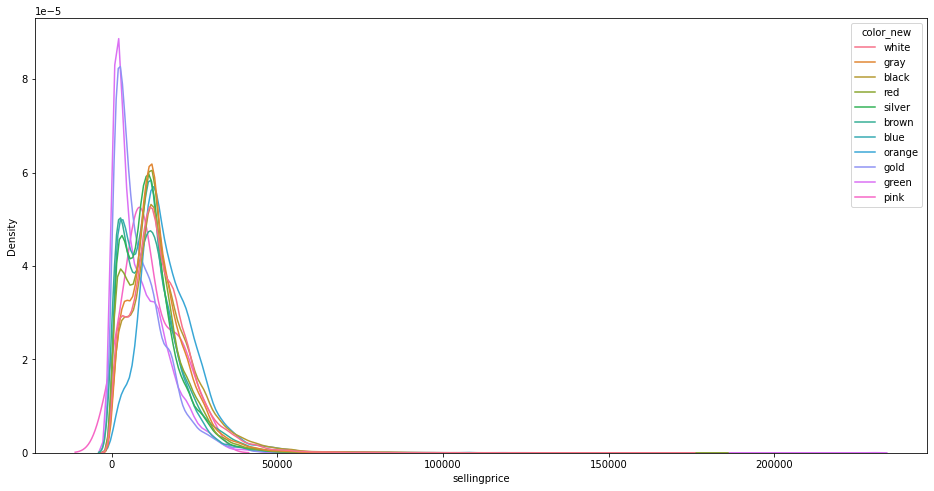

In [ ]:
# KDE color_new vs sellingprice
plt.figure(figsize=(16, 8))
sns.kdeplot(data=df, x='sellingprice', hue='color_new', common_norm=False);

### 4.3.2 Interior

In [ ]:
# mengganti nilai - menjadi unknown pada kolom interior
df.interior = df.interior.replace('—', 'unknown')

In [ ]:
# Rekategori kolom interior: black, blue, brown, off-white, red, beige, blue, gray (lihat sub bagian 3.2.4)
def interior_category(x):
  if x['color'] == 'black':
    interior = 'black'
  elif x['color'] == 'blue':
    interior = 'blue'
  elif x['color'] == 'brown':
    interior = 'brown'
  elif x['color'] == 'off-white':
    interior = 'off-white'
  elif x['color'] == 'red':
    interior = 'red'
  elif x['color'] == 'beige':
    interior = 'beige'
  elif x['color'] == 'blue':
    interior = 'blue'
  elif x['color'] == 'gray':
    interior = 'gray'
  else:
    interior= 'others'
  return interior

In [ ]:
# membuat kolom baru yaitu kolom interior_new menggunakan fungsi interior_category
df['interior_new'] = df.apply(lambda x: interior_category(x), axis=1)

In [ ]:
# KDE interior_new vs sellingprice
plt.figure(figsize=(16, 8))
sns.kdeplot(data=df, x='sellingprice', hue='interior_new', common_norm=False, palette="bright");

In [ ]:
# KDE interior vs sellingprice
plt.figure(figsize=(16, 8))
sns.kdeplot(data=df, x='sellingprice', hue='interior', common_norm=False, palette="bright");

## 4.4 Handling Inconsistent Values

### 4.4.1 Make

In [ ]:
# unique value pada kolom make (sebelum handling)
df.make.nunique()

In [ ]:
# memperbaiki nilai yang berbeda karakter huruf (kapital, lowercase) pada kolom make 
df['make'] = df['make'].str.lower()
df['make'].nunique()

In [ ]:
df.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'buick', 'cadillac', 'acura', 'lexus', 'hyundai', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'saab', 'suzuki',
       'oldsmobile', 'geo', 'rolls-royce', 'isuzu', 'plymouth', 'tesla',
       'aston martin', 'fisker', 'daewoo', 'lamborghini', 'lotus'],
      dtype=object)

In [ ]:
make_grouped = df.groupby('make').agg({'sellingprice':'count'}).reset_index()
make_grouped['Percentage']=make_grouped['sellingprice']*100/make_grouped.sellingprice.sum()
make_grouped.sort_values('sellingprice', ascending=False).reset_index(drop=True)

,make,sellingprice,Percentage
0,ford,91908,17.222201
1,chevrolet,58817,11.021437
2,nissan,53085,9.947345
3,toyota,38991,7.306337
4,dodge,30102,5.640670
5,honda,26373,4.941911
6,hyundai,21474,4.023910
7,bmw,20140,3.773938
8,kia,17870,3.348574
9,chrysler,16916,3.169808


Value yang tidak konsisten:
- mercedes-benz, mercedes, mercedes-b
- volkswagen, vw
- land rover, landrover
- ford tk, ford truck (diubah ke ford tk)



(Juldan)\
Fiat owns: Alfa Romeo, Chrysler, Dodge, Ferrari, Jeep, Lancia, Maserati, and Ram. \
Ford Motor Company owns: Lincoln and a small stake in Mazda. \
General Motors owns: Buick, Cadillac, Chevrolet, and GMC. [ref](https://autos.yahoo.com/news/owns-car-brands-140000017.html)
\
\
tujuannya untuk penjualan yang dibawah x% bisa di anggap merge dengan perusahaan top 10/ top 20 nya.

In [ ]:
# Ubah value yang tidak konsisten pada kolom make
old = ['mercedes-benz', 'mercedes', 'mercedes-b', 'vw', 'landrover', 'ford tk']
new = ['mercedes benz', 'mercedes benz', 'mercedes benz', 'volkswagen', 'land rover', 'ford truck']
df['make'] = df['make'].replace(old, new)

In [ ]:
print('Total Unique Value:', df.make.nunique())
df.make.unique()

Total Unique Value: 53


array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'buick', 'cadillac', 'acura', 'lexus', 'hyundai', 'infiniti',
       'jeep', 'mercedes benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'saab', 'suzuki',
       'oldsmobile', 'geo', 'rolls-royce', 'isuzu', 'plymouth', 'tesla',
       'aston martin', 'fisker', 'daewoo', 'lamborghini', 'lotus'],
      dtype=object)

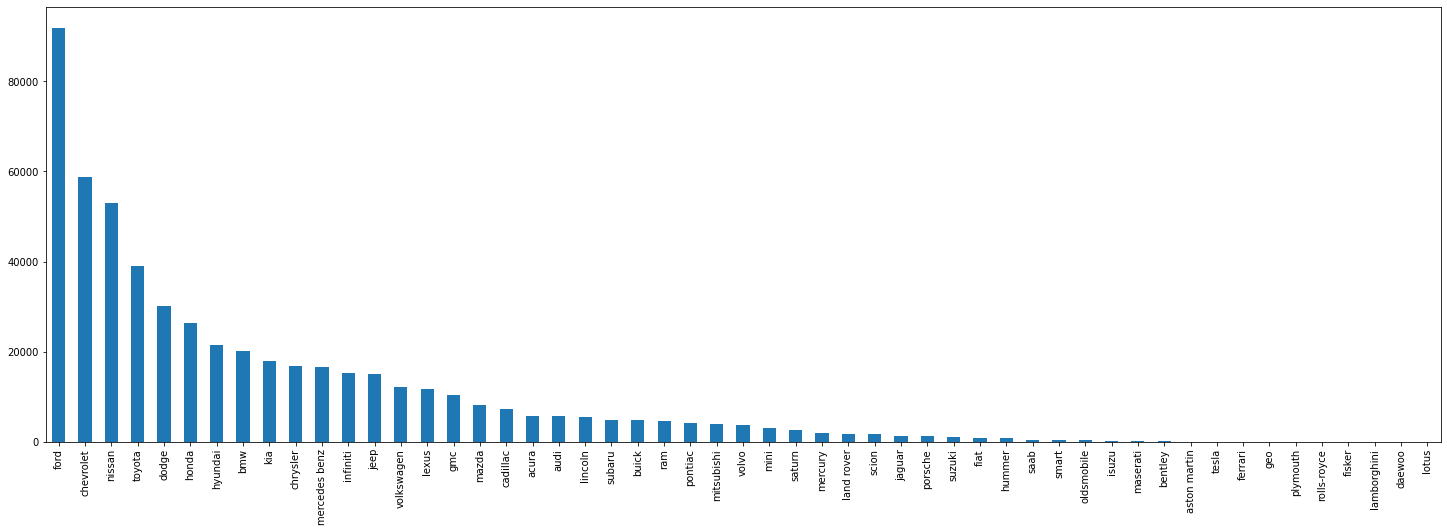

In [ ]:
# semua value make
plt.figure(figsize=(25, 8))
df['make'].value_counts().plot(kind="bar");

Hasil Pengamatan: Kolom make unique valuenya masih banyak kira-kira bagaimana?

In [ ]:
# membuat kategori baru dari kolom make
def make_category(x):
  if x['make'] == 'ford':
    make = 'ford'
  elif x['make'] == 'chevrolet':
    make = 'chevrolet'
  elif x['make'] == 'nissan':
    make = 'nissan'
  elif x['make'] == 'toyota':
    make = 'toyota'
  elif x['make'] == 'dodge':
    make = 'dodge'
  elif x['make'] == 'honda':
    make = 'honda'
  elif x['make'] == 'hyundai':
    make = 'hyundai'
  elif x['make'] == 'bmw':
    make = 'bmw'
  elif x['make'] == 'mercedes benz':
    make = 'mercedes benz'
  elif x['make'] == 'kia':
    make = 'kia'
  else:
    make= 'others'
  return make

In [ ]:
# membuat kolom baru yaitu kolom make_new menggunakan fungsi color_category
df['make_new'] = df.apply(lambda x: make_category(x), axis=1)

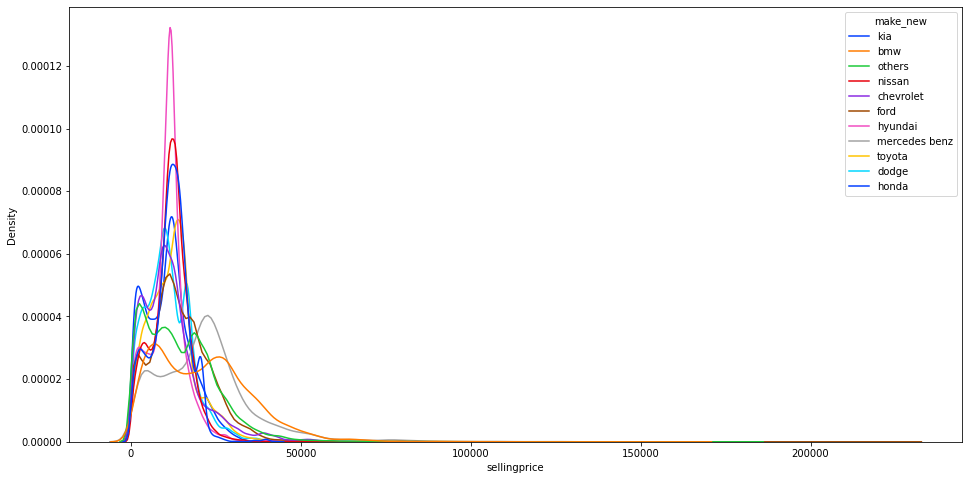

In [ ]:
# KDE make_new vs sellingprice
plt.figure(figsize=(16, 8))
sns.kdeplot(data=df, x='sellingprice', hue='make_new', common_norm=False, palette="bright");

### 4.4.2 Body

In [ ]:
# unique value pada kolom body (sebelum handling)
df.body.nunique()

86

In [ ]:
# memperbaiki nilai yang berbeda karakter huruf (kapital, lowercase) pada kolom body 
df['body'] = df['body'].str.lower()
df['body'].nunique()

45

In [ ]:
df['body'].unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'beetle convertible', 'tsx sport wagon',
       'promaster cargo van', 'cab plus', 'granturismo convertible',
       'cts-v wagon', 'ram van', 'transit van', 'regular-cab'],
      dtype=object)

In [ ]:
# kita buat jadi 8 kategori umum 
body_new_list = []
for i, row in df.iterrows():
  bodi = str(row['body'])
  
  if 'cab' in bodi:
    result = 'cab'
  
  elif 'supercrew' in bodi:
    result = 'cab'
  
  elif 'convertible' in bodi:
    result = 'convertible'

  elif 'van' in bodi:
    result = 'van'

  elif 'koup' in bodi:
    result = 'coupe'

  elif 'coupe' in bodi:
    result = 'coupe'

  elif 'suv' in bodi:
    result = 'suv'

  elif 'sedan' in bodi:
    result = 'sedan'

  elif 'wagon' in bodi:
    result = 'wagon'

  elif 'hatchback' in bodi:
    result = 'hatchback'

  body_new_list.append(result)

df['body_new'] = body_new_list

Kita buat body yg lebih general:
- cab, supercrew (sbg cab juga) -> [cab and supercrew](https://www.butlerfordinc.com/ford-f-150-cab-styles-comparison-milledgeville-ga.htm)
- convertible
- van
- koup, coupe (ini sama)
- suv
- sedan
- wagon
- hatchback

referensi: [tipe bodi mobil](https://teknisimobil.com/dasar-otomotif/8-bentuk-bodi-mobil-apa-saja-itu-16369/)

In [ ]:
# validasi entri di kolom body
df[['body', 'body_new']].sample(10)

,body,body_new
65691,suv,suv
328985,sedan,sedan
255750,sedan,sedan
77694,supercab,cab
338885,suv,suv
148712,sedan,sedan
159086,sedan,sedan
278615,sedan,sedan
144579,suv,suv
454456,sedan,sedan


## 4.5 Feature Transformation (1) <br>
Log Transformation: odometer, mmr, sellingprice
- Apakah transformasi dulu lalu dilakukan handling outlier ? atau sebaliknya?

### 4.5.1 Common Log Transformation

In [ ]:
# # KDE sebelum log transformation
# cols = ['odometer', 'mmr']

# plt.figure(figsize=(8, 6))
# for i in range(len(cols)):
#   plt.subplot(3, 1, i+1)
#   sns.histplot(data=df, x=df[cols[i]], kde=True)
#   plt.tight_layout()

In [ ]:
# # log transformation 
# df['odo_tf'] = df['odometer'].apply(lambda x : x**(1/3))
# df['mmr_tf'] = df['mmr'].apply(lambda x : x**(1/3))

# print(df['odo_tf'].skew())
# print(df['mmr_tf'].skew())

In [ ]:
# # KDE setelah Transformasi mas juldan
# cols = ['odo_tf', 'mmr_tf']

# plt.figure(figsize=(8, 6))
# for i in range(len(cols)):
#   plt.subplot(3, 1, i+1)
#   sns.histplot(data=df, x=df[cols[i]], kde=True)
#   plt.tight_layout()

### 4.5.2 PowerTransformer <br>
- https://medium.com/towards-data-science/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94
- Perlu ga sih setelah kita transformasi odometer dilakukan juga normalisasi/standarisasi?

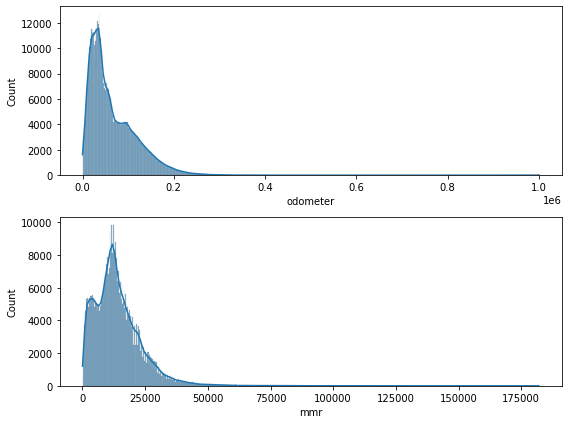

In [ ]:
# KDE sebelum PowerTransformer
cols = ['odometer', 'mmr']

plt.figure(figsize=(8, 6))
for i in range(len(cols)):
  plt.subplot(2, 1, i+1)
  sns.histplot(data=df, x=df[cols[i]], kde=True)
  plt.tight_layout()

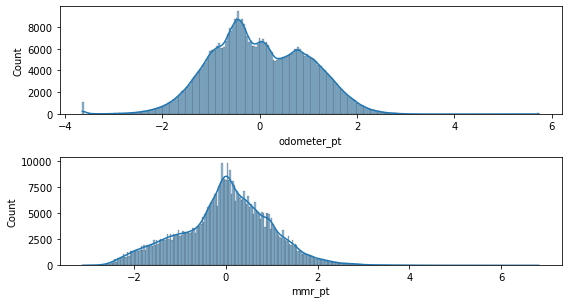

In [ ]:
# Transformasi dengan PowerTransformer
from sklearn.preprocessing import PowerTransformer

df['odometer_pt'] = PowerTransformer().fit_transform(df['odometer'].values.reshape(len(df), 1))
df['mmr_pt'] = PowerTransformer().fit_transform(df['mmr'].values.reshape(len(df), 1))

# KDE setelah Transformasi dengan PowerTransformer
cols = ['odometer_pt', 'mmr_pt']

plt.figure(figsize=(8, 6))
for i in range(len(cols)):
  plt.subplot(3, 1, i+1)
  sns.histplot(data=df, x=df[cols[i]], kde=True)
  plt.tight_layout()

In [ ]:
print(df['odometer_pt'].skew())
print(df['mmr_pt'].skew())

0.012277500663525181
0.010410364035744014


Kita pakai yang ini power transformer.

## 4.4 Feature Transformation (2)
- kolom year dan condition perlu ga sih di transfromasi juga?
- kolom year itu left skewed perlu ditransformasi juga ga?

In [ ]:
df[num].skew()

year           -1.228627
condition      -0.363759
odometer        1.907852
mmr             1.999844
sellingprice    1.949918
dtype: float64

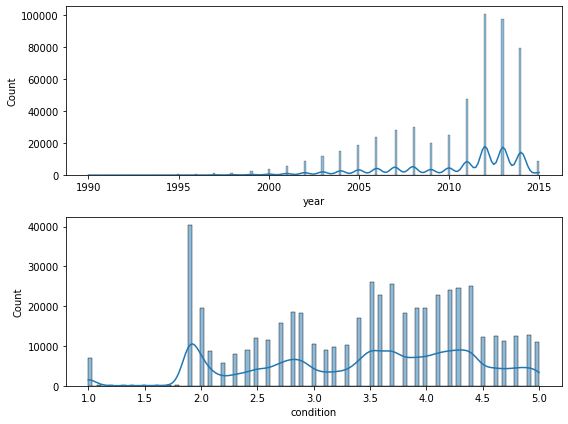

In [ ]:
# KDE sebelum Normalisasi/Standarisasi
cols = ['year', 'condition']

plt.figure(figsize=(8, 6))
for i in range(len(cols)):
  plt.subplot(len(cols), 1, i+1)
  sns.histplot(data=df, x=df[cols[i]], kde=True)
  plt.tight_layout()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['year_norm'] = StandardScaler().fit_transform(df['year'].values.reshape(len(df), 1)) #year tidak dapat di std, karena tidak mendekati distribusi normal (Juldan)
df['condition_norm'] = MinMaxScaler().fit_transform(df['condition'].values.reshape(len(df), 1))
# df['condition_std'] = StandardScaler().fit_transform(df['condition'].values.reshape(len(df), 1))
#norm setelah std akan menghasilkan hasil yang sama jika data langsung di std, ataupun std setelah norm akan menghasilkan hasil yang sama dengan hasil yang langsung di norm dan std (Juldan)

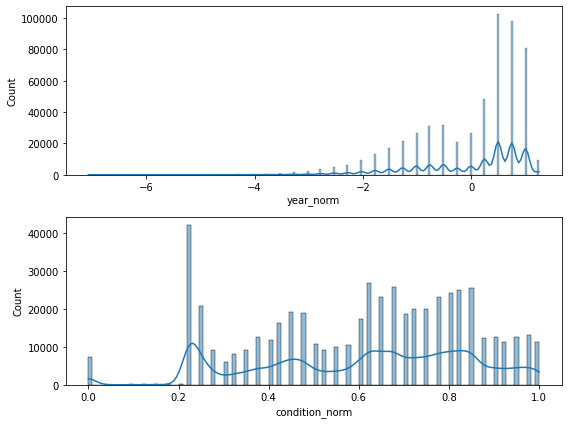

In [ ]:
# KDE setelah Normalisasi/Standarisasi
cols = ['year_norm', 'condition_norm']

plt.figure(figsize=(8, 6))
for i in range(len(cols)):
  plt.subplot(len(cols), 1, i+1)
  sns.histplot(data=df, x=df[cols[i]], kde=True)
  plt.tight_layout()

#Juldan : Normalisasi dan standarisasi tidak perlu ditampilkan tabelnya, hanya perlu di tampilkan data stats nya, karna trans ini tidak mengubah banyak bentuk grafik.

In [ ]:
df[['condition']].describe()

,condition
count,547017.000000
mean,3.424512
std,0.949439
min,1.000000
25%,2.700000
50%,3.600000
75%,4.200000
max,5.000000


In [ ]:
#df[['condition_norm','condition_std']].describe()

## 4.5 Handling Outliers

### 4.5.1 Log Transformation (abaikan saja)

In [ ]:
# boxplot sebelum log transformation
# cols = ['odometer', 'sellingprice']

# plt.figure(figsize=(9,6))
# for i in range(len(cols)):
#     plt.subplot(1, len(cols), i+1)
#     sns.boxplot(y = df[cols[i]], orient = 'v')
#     plt.tight_layout()

In [ ]:
# boxplot setelah log transformation
#cols = ['odometer_log', 'sellingprice_log']
#plt.figure(figsize=(9,6))
#for i in range(len(cols)):
 #   plt.subplot(1, len(cols), i+1)
 #   sns.boxplot(y = df[cols[i]], orient = 'v')
 #   plt.tight_layout()

In [ ]:
# rows_before_filt = len(df)
# print('Jumlah Baris sebelum filter:', rows_before_filt)

In [ ]:
# kolom yang difilter dengan z-scores
# cols = ['odometer_log', 'mmr_log', 'sellingprice_log']

# filtered_entries = np.array([True] * len(df))

# for col in cols:
#     zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
#     filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
# df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

In [ ]:
# rows_after_filt = len(df)
# diff = (rows_before_filt - rows_after_filt) / rows_before_filt * 100
# print(f'Jumlah baris setelah memfilter outlier: {len(df)}')
# print(f'Persentase outlier yang dibuang:', diff)

In [ ]:
# # boxplot setelah log transformation dan setelah filter outlier
# cols = ['odometer_log', 'mmr_log', 'sellingprice_log']
# plt.figure(figsize=(9,6))
# for i in range(len(cols)):
#     plt.subplot(1, len(cols), i+1)
#     sns.boxplot(y = df[cols[i]], orient = 'v')
#     plt.tight_layout()

In [ ]:
# KDE setelah log transformation dan filter outlier
# cols = ['odometer_log', 'mmr_log', 'sellingprice_log']

# plt.figure(figsize=(9, 6))
# for i in range(len(cols)):
#   plt.subplot(3, 1, i+1)
#   sns.histplot(data=df, x=df[cols[i]], kde=True)
#   plt.tight_layout()

### 4.5.2 PowerTransformer

KeyError: ignored

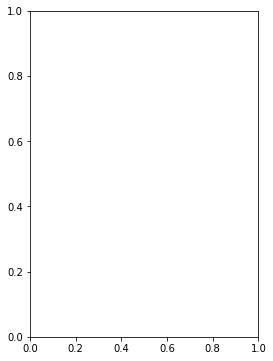

In [ ]:
# boxplot sebelum handling outlier
cols = ['odometer_pt', 'sellingprice']

plt.figure(figsize=(9,6))
for i in range(len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y = df[cols[i]], orient = 'v')
    plt.tight_layout()

In [ ]:
rows_before_filt = len(df)
print('Jumlah Baris sebelum filter:', rows_before_filt)

Jumlah Baris sebelum filter: 558811


In [ ]:
# kolom yang difilter dengan z-scores
cols = ['odometer_pt', 'sellingprice']

filtered_entries = np.array([True] * len(df))

for col in cols:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

KeyError: ignored

In [ ]:
rows_after_filt = len(df)
diff = (rows_before_filt - rows_after_filt) / rows_before_filt * 100
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')
print(f'Persentase outlier yang dibuang:', diff)

Jumlah baris setelah memfilter outlier: 525058
Persentase outlier yang dibuang: 1.6118877187722518


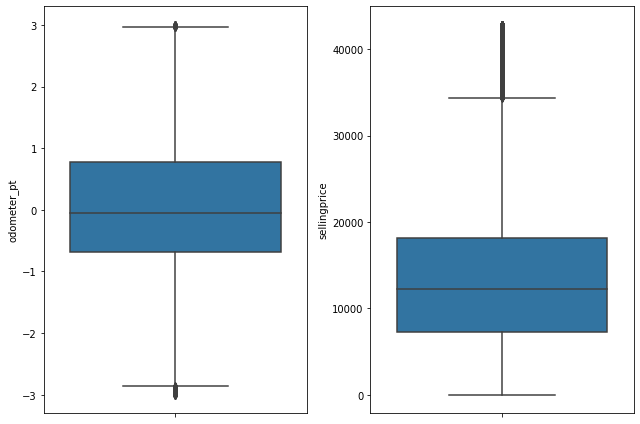

In [ ]:
# boxplot setelah PowerTransformer dan handlingoutlier
cols = ['odometer_pt', 'sellingprice']
plt.figure(figsize=(9,6))
for i in range(len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y = df[cols[i]], orient = 'v')
    plt.tight_layout()

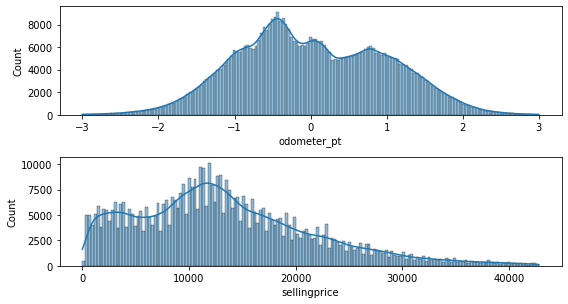

In [ ]:
cols = ['odometer_pt', 'sellingprice']
plt.figure(figsize=(8, 6))
for i in range(len(cols)):
  plt.subplot(3, 1, i+1)
  sns.histplot(data=df, x=df[cols[i]], kde=True)
  plt.tight_layout()

Apalah kolom sellingprice_pt, odometer_pt, dan mmr masih perlu dinormalisasi lagi agar semuanya memiliki skala nilai yang sama? Atau perlu distandarisasi lagi?

## 4.7 Drop Kolom yang tidak digunakan

In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'color_new', 'interior_new', 'make_new',
       'body_new', 'odometer_pt', 'mmr_pt', 'year_norm', 'condition_norm'],
      dtype='object')

In [ ]:
# kolom yang digunakan
col_use = ['year', 'make', 'transmission', 'state',
       'condition', 'odometer',
       'sellingprice', 'saledate', 'color_new', 'interior_new', 'make_new',
       'body_new', 'odometer_pt', 'year_norm', 'condition_norm']

In [ ]:
# dataframe baru
df_new = df[col_use]
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,sellingprice,saledate,color_new,interior_new,make_new,body_new,odometer_pt,mmr_pt,year_norm,condition_norm
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),white,others,kia,suv,-1.162392,0.807479,1.24564,1.0
1,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),white,others,kia,suv,-1.595210,0.832403,1.24564,1.0


## 4.6 Feature encoding

## 4.6.1 Label Encoding

In [ ]:
# label encoding:

mapping_transmisi = {
    'automatic' : 0,
    'manual' : 1
}

df_new['transmission'] = df_new['transmission'].map(mapping_transmisi)
df_new.transmission

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         0
1         0
2         0
3         0
5         0
         ..
558806    0
558807    0
558808    0
558809    0
558810    0
Name: transmission, Length: 525058, dtype: int64

## 4.6.2 One Hot Encoding

In [ ]:
# OHE

for cat in ['color_new', 'interior_new', 'make_new',
       'body_new']:
    onehots = pd.get_dummies(df_new[cat], prefix=cat, drop_first=True) # drop_first=True
    df_new = df_new.join(onehots)

In [ ]:
df_new.head(2)

,year,make,transmission,state,condition,odometer,sellingprice,saledate,color_new,interior_new,...,make_new_nissan,make_new_others,make_new_toyota,body_new_convertible,body_new_coupe,body_new_hatchback,body_new_sedan,body_new_suv,body_new_van,body_new_wagon
0,2015,kia,0,ca,5.0,16639.0,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),white,others,...,0,0,0,0,0,0,0,1,0,0
1,2015,kia,0,ca,5.0,9393.0,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),white,others,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(525058, 24)

## Feature Selection

PERTANYAAN: <br>
- feature numerik: semua numerik dipakai sbg feature kecuali mmr.
- fature kategorik: make, body, transsmission, state, color, interior.
- year dan odometer redundan karena corr 0.77. Ini tetap dipakai keduanya? atau salah satu yg corr paling tinggi dengan sellingprice

## Feature Extraction

In [ ]:
def check_size(data):
    print(data, type(data))
    if (type(data) != str) :
        return '-'
    try:
        if 'suv' in data or 'wagon' in data or 'minivan' in data:
            return 1
        elif 'cab' in data or 'van' in data or 'supercrew' in data:
            return 2
        else:
            if data == 'nan':
                return '-'
            else :
                return 0
    except ValueError:
        print("")